In [35]:
from lxml import objectify
import pandas as pd
import os

def get_pandas_df(xml):
    root = xml.getroot()
    df = pd.DataFrame(columns=('idInPhoto', 'filename', 'name', 'xMin', 'yMin', 'xMax', 'yMax', 'path')) 
    # df['table'] = None
    
    for i in range(6,len(root.getchildren())):
        row = \
           [
               str(i - 5),
               str(root.getchildren()[1]), 
               str(root.getchildren()[i].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[1]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[2] - root.getchildren()[i].getchildren()[4].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[3] - root.getchildren()[i].getchildren()[4].getchildren()[1]),
               str(root.getchildren()[2])
           ]
        # print(row)
        # print(df.columns)
        df.loc[df.shape[0]] = row
    return df

from os import listdir
from os.path import isfile, join
mypath = '/home/darius/haarcascade/xmls/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df = pd.DataFrame()
for i, x in enumerate(onlyfiles):
    new_df = get_pandas_df(objectify.parse(open(mypath+x)))
    df = pd.concat([df, new_df])
    if i % 100 == 0:
        print(i/100, end=' ')
onlyfiles
df.to_csv('/home/darius/haarcascade/good.csv')

0.0 1.0 2.0 3.0 4.0 

In [26]:
import os

f = open('/home/darius/haarcascade/bg.txt', 'a+')
path_f = []
for d, dirs, files in os.walk('/home/darius/haarcascade/pictures/'):
    for x in files:
        path = os.path.join(d, x) 
        path_f.append(path)
f.write("\n".join(path_f))

f.close()


In [27]:
import os

f = open('/home/darius/haarcascade/good.txt', 'a+')
path_f = []
for d, dirs, files in os.walk('/home/darius/haarcascade/xmls/'):
    for x in files:
        path = os.path.join(d, x) 
        path_f.append(path)
f.write("\n".join(path_f))

f.close()

In [28]:
from lxml import objectify
import pandas as pd
import os

def get_pandas_df(xml):
    root = xml.getroot()
    df = pd.DataFrame(columns=('idInPhoto', 'filename', 'name', 'xMin', 'yMin', 'width', 'height', 'path')) 
    # df['table'] = None
    
    for i in range(6,len(root.getchildren())):
        row = \
           [
               str(i - 5),
               str(root.getchildren()[1]), 
               str(root.getchildren()[i].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[1]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[2] - root.getchildren()[i].getchildren()[4].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[3] - root.getchildren()[i].getchildren()[4].getchildren()[1]),
               str(root.getchildren()[2])
           ]
        # print(row)
        # print(df.columns)
        df.loc[df.shape[0]] = row
    return df
f = open('/home/darius/haarcascade/good.txt', 'a+')
from os import listdir
from os.path import isfile, join
mypath = '/home/darius/haarcascade/xmls/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df = pd.DataFrame()
for i, x in enumerate(onlyfiles):
    new_df = get_pandas_df(objectify.parse(open(mypath+x)))
    df = pd.concat([df, new_df])
    if i % 100 == 0:
        print(i/100, end=' ')
onlyfiles
f.write("\n".join(onlyfiles))
f.close()

0.0 

In [29]:
import pandas as pd

#df = pd.read_csv('/home/darius/haarcascade/good.csv', usecols=['filename', 'xMin', 'yMin', 'xMax', 'yMax'])
text_list = []
with open('/home/darius/haarcascade/good.csv', "r") as my_input_file:
    for line in my_input_file:
        line = line.split(" ", 2)
        text_list.append(" ".join(line))

with open('/home/darius/haarcascade/good1.dat', "w") as my_output_file:
    my_output_file.write("double({},{})\n".format(len(text_list), 2))
    for line in text_list:
        my_output_file.write("  " + line)
    print('File Successfully written.')

File Successfully written.


In [37]:
f = open('/home/darius/haarcascade/good.dat', 'a+')
for _, i in df.iterrows():    
    f.writelines(i['filename']+' '+ str(1) +' '+str(i['xMin'])+' '+str(i['yMin'])+' '+str(i['xMax'])+' '+str(i['yMax'])+'\n')
f.close()

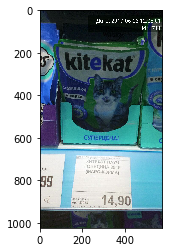

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
receipt_cascade = cv2.CascadeClassifier('/home/darius/haarcascade/cascade.xml')
img = cv2.imread('/home/darius/Work/Text recognition/kb/71802148.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
receipt = receipt_cascade.detectMultiScale(gray, 1.2, 5)
for (x,y,w,h) in receipt:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),-1)
plt.imshow(img,cmap='gray')
plt.show()


In [17]:
?df.to_dict

In [126]:
f = open('/home/darius/haarcascade/good1.dat', 'a+')
for _, i in df.iterrows():  
    
    f.writelines(i['filename']+' '+ str(1) +' '+str(i['xMin'])+' '+str(i['yMin'])+' '+str(i['xMax'])+' '+str(i['yMax'])+'\n')
f.close()

In [120]:
df1 = pd.DataFrame({'a': [7, 2, 3, 4, 4], 'b': [5, 6, 7, 8, 9], 
                   'c': [1, 1, 1, 1, 1]})

res = df1.groupby('a').last()
str(res.b[7]) + ' ' + str(res.c[7])

'5 1'

In [6]:
from lxml import objectify
import pandas as pd
import os

def get_pandas_df(xml):
    root = xml.getroot()
    df = pd.DataFrame(columns=('idInPhoto', 'filename', 'name', 'xMin', 'yMin', 'width', 'height', 'path')) 
    # df['table'] = None
    
    for i in range(6,len(root.getchildren())):
        row = \
           [
               str(i - 5),
               str(root.getchildren()[1]), 
               str(root.getchildren()[i].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[1]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[2] - root.getchildren()[i].getchildren()[4].getchildren()[0]), 
               str(root.getchildren()[i].getchildren()[4].getchildren()[3] - root.getchildren()[i].getchildren()[4].getchildren()[1]),
               str(root.getchildren()[2])
           ]
        # print(row)
        # print(df.columns)
        df.loc[df.shape[0]] = row
    return df

from os import listdir
from os.path import isfile, join
mypath = '/home/darius/haarcascade1/xmls/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df = pd.DataFrame()
for i, x in enumerate(onlyfiles):
    new_df = get_pandas_df(objectify.parse(open(mypath+x)))
    df = pd.concat([df, new_df])
    if i % 100 == 0:
        print(i/100, end=' ')
onlyfiles
df.to_csv('/home/darius/haarcascade1/good.csv')

0.0 

In [2]:
import os

f = open('/home/darius/haarcascade1/bg.txt', 'a+')
path_f = []
for d, dirs, files in os.walk('/home/darius/haarcascade1/pictures/'):
    for x in files:
        path = os.path.join(d, x) 
        path_f.append(path)
f.write("\n".join(path_f))

f.close()

In [7]:
f = open('/home/darius/haarcascade1/good.dat', 'a+')
for _, i in df.iterrows():  
    
    f.writelines(i['filename']+' '+ str(1) +' '+str(i['xMin'])+' '+str(i['yMin'])+' '+str(i['width'])+' '+str(i['height'])+'\n')
f.close()